In [1]:
import rasterio
import rasterio.features
import fiona

import matplotlib.pyplot as plt
%matplotlib inline

Load the ASTER thermal image using rasterio.

In [2]:
img_name = 'AST_08_00310252015145234_20170919180811_13210.SurfaceKineticTemperature.KineticTemperature.tif'

In [3]:
with rasterio.open(img_name) as src:
    # Print the raster metadata
    print(src.meta)
    # Read the first (and only) band
    img = src.read(1)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 830, 'height': 700, 'count': 1, 'crs': CRS.from_epsg(32750), 'transform': Affine(89.01411239141112, 13.28487091278009, 281279.41706948756,
       13.28487091278009, -89.01411239141112, 9073854.504899446)}


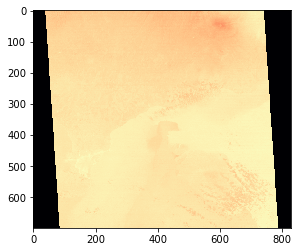

In [4]:
plt.imshow(img, cmap='magma')

The volcanic thermal feature (VTF) or anomaly is in the top right corner.

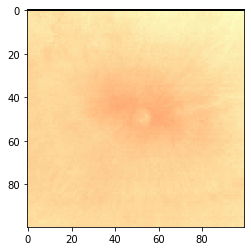

In [5]:
plt.imshow(img[0:100,550:650], cmap='magma')

Load the reference shapefile that defines where the anomaly is located.

In [6]:
shp_path = 'ref/Agung102515hotspot.shp'

In [7]:
with fiona.open(shp_path, 'r') as shapefile:
    shapes = [feature['geometry'] for feature in shapefile]

Convert the shapes to a raster so we can compare directly with our image.

In [8]:
vtf = rasterio.features.rasterize(shapes, out_shape=img.shape, transform=src.transform)

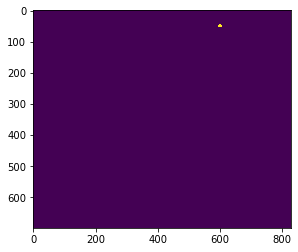

In [9]:
plt.imshow(vtf)

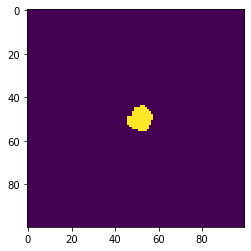

In [10]:
plt.imshow(vtf[0:100,550:650])

Plot the known anomaly shape on top of the raster.

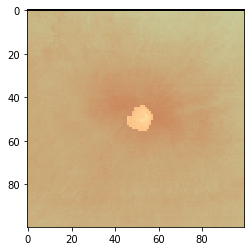

In [11]:
plt.imshow(img[0:100,550:650], cmap='magma')
plt.imshow(vtf[0:100,550:650], cmap='magma', alpha=0.2)